In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn") 

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from collections import namedtuple
from IPython.display import display
from pprint import pprint
from circuit_presets import get_wire_combos
from reporting_functions import (
    get_file_content,
    confusion_matrix_stats,
    get_result_table,
    get_result_table_target_pairs,
    gather_results_0_12,
    get_experiment_config,
    get_model_names,
    plot_loss
)
path_experiments = f"{project_home_dir}/experiments"

### Experiment 0 
___
First experiment, testing out all circuit and encoding combinations for (pop, classical) target pair
 - **Encoding**: *
 - **Circuit**: *
 - **Target Pair**: (Pop, Classical)
 - **Scaling**: minmax(0, 1) / standardised
 - **Feature Selection**: pca
 

embedding_type          Amplitude_Hybrid2_1  Amplitude_Hybrid2_2  \
circuit                                                            
U_13                               0.550000             0.566667   
U_14                               0.533333             0.550000   
U_15                               0.583333             0.616667   
U_5                                0.616667             0.650000   
U_6                                0.666667             0.600000   
U_9                                0.666667             0.500000   
U_SO4                              0.683333             0.700000   
U_SU4                              0.550000             0.583333   
U_TTN                              0.583333             0.450000   
embedding_type Average             0.603704             0.579630   

embedding_type          Amplitude_Hybrid2_3  Amplitude_Hybrid2_4  \
circuit                                                            
U_13                               0.483333             0.566667   
U_14                               0.616667             0.600000   
U_15                               0.683333             0.600000   
U_5                                0.566667             0.583333   
U_6                                0.550000             0.666667   
U_9                                0.550000             0.516667   
U_SO4                              0.633333             0.733333   
U_SU4                              0.583333             0.566667   
U_TTN                              0.516667             0.616667   
embedding_type Average             0.575926             0.605556   

embedding_type          Amplitude_Hybrid4_1  Amplitude_Hybrid4_2  \
circuit                                                            
U_13                               0.583333             0.550000   
U_14                               0.550000             0.533333   
U_15                               0.633333             0.550000   
U_5                                0.450000             0.616667   
U_6                                0.700000             0.716667   
U_9                                0.550000             0.466667   
U_SO4                              0.416667             0.550000   
U_SU4                              0.616667             0.533333   
U_TTN                              0.516667             0.583333   
embedding_type Average             0.557407             0.566667   

embedding_type          Amplitude_Hybrid4_3  Amplitude_Hybrid4_4     Angle  \
circuit                                                                      
U_13                               0.433333             0.483333  1.000000   
U_14                               0.516667             0.600000  0.983333   
U_15                               0.500000             0.500000  1.000000   
U_5                                0.400000             0.516667  1.000000   
U_6                                0.583333             0.650000  0.983333   
U_9                                0.600000             0.483333  0.983333   
U_SO4                              0.550000             0.533333  0.983333   
U_SU4                              0.533333             0.533333  1.000000   
U_TTN                              0.433333             0.516667  0.950000   
embedding_type Average             0.505556             0.535185  0.987037   

embedding_type          Angular_Hybrid2_1  Angular_Hybrid2_2  \
circuit                                                        
U_13                             0.950000           0.983333   
U_14                             0.966667           0.966667   
U_15                             0.983333           0.983333   
U_5                              1.000000           0.966667   
U_6                              1.000000           0.983333   
U_9                              0.966667           0.983333   
U_SO4                            0.966667           0.950000   
U_SU4                            0.9

None

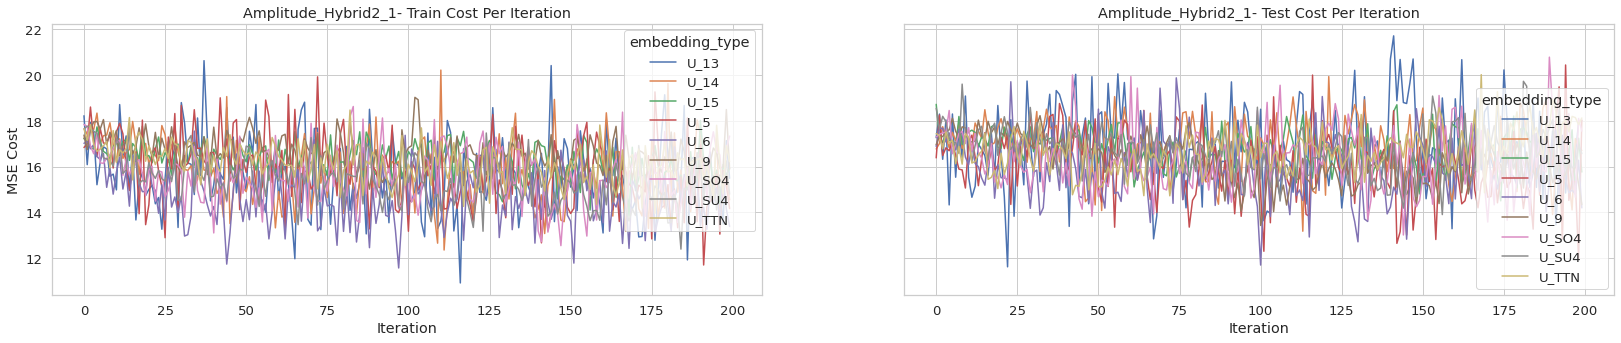

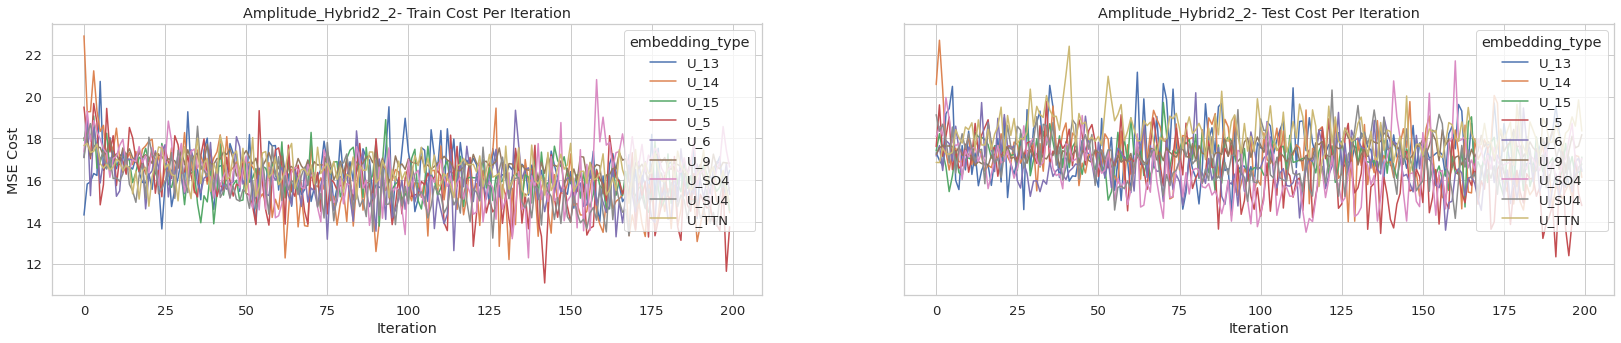

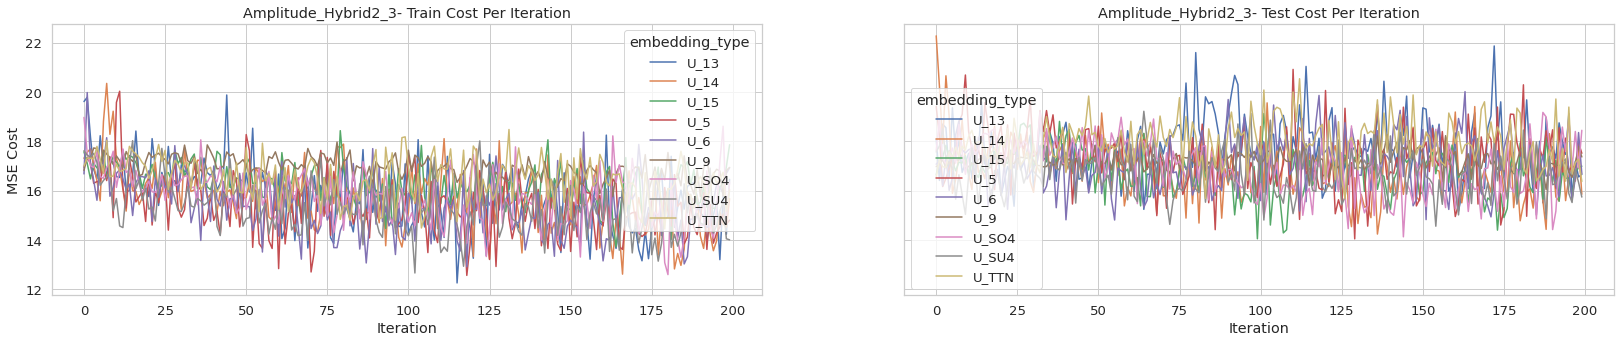

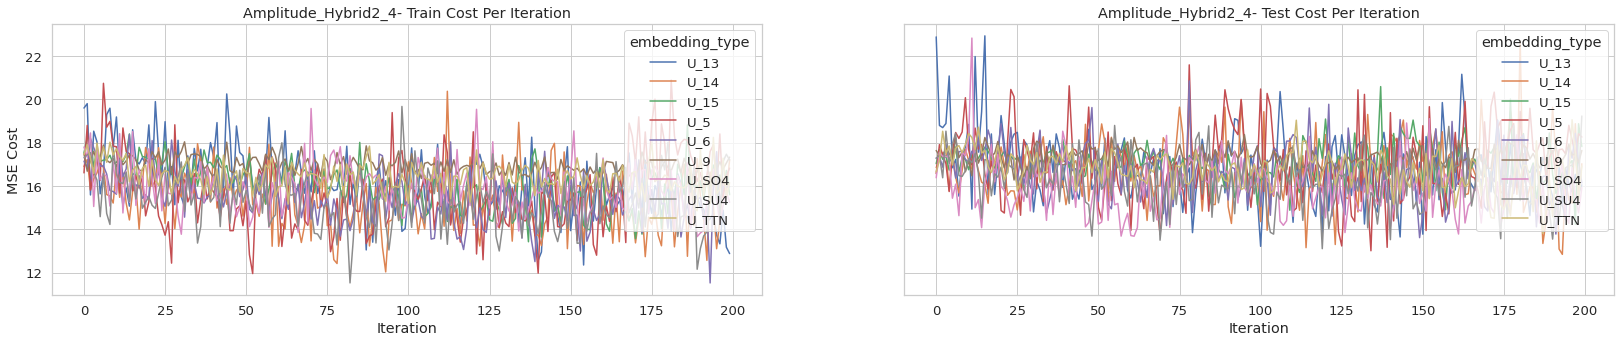

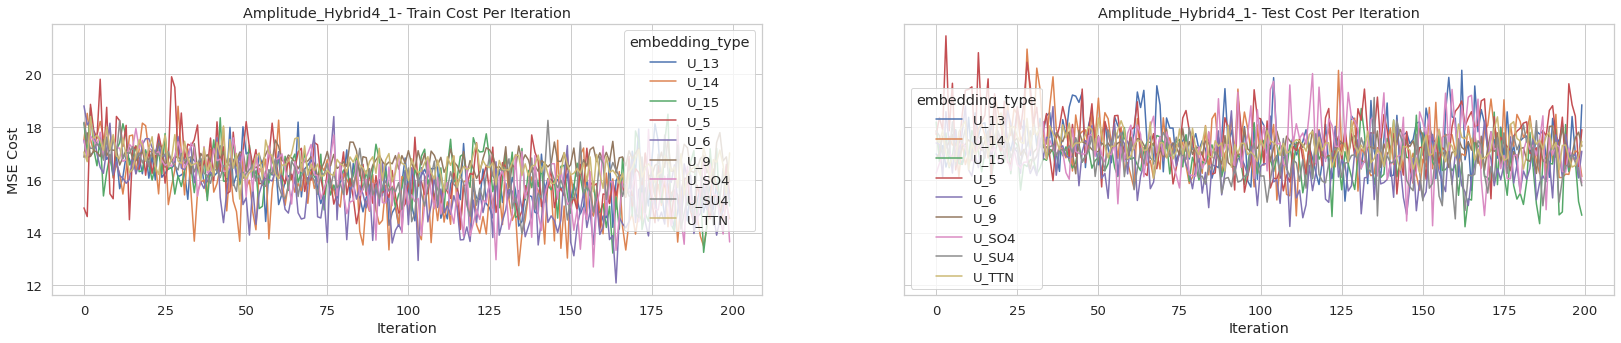

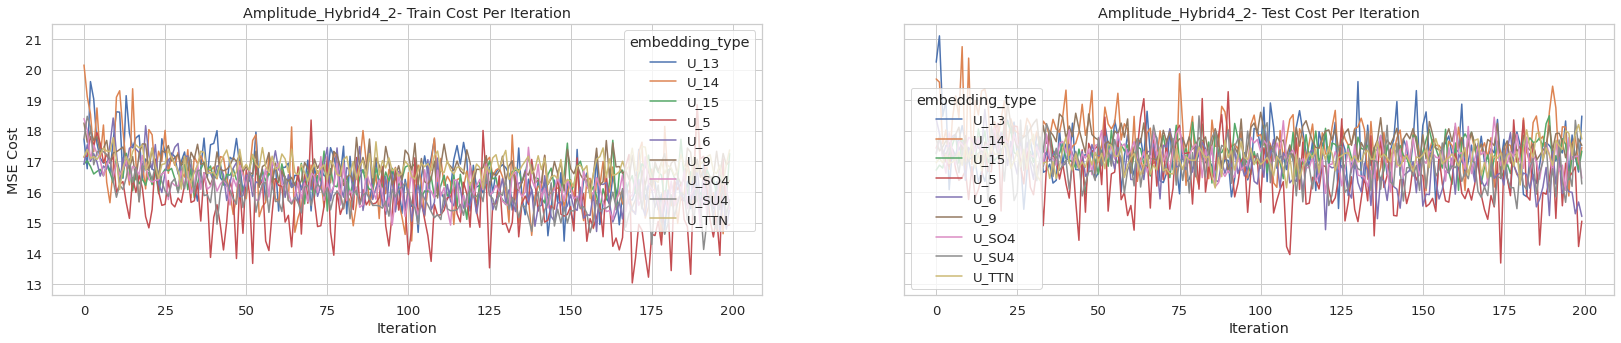

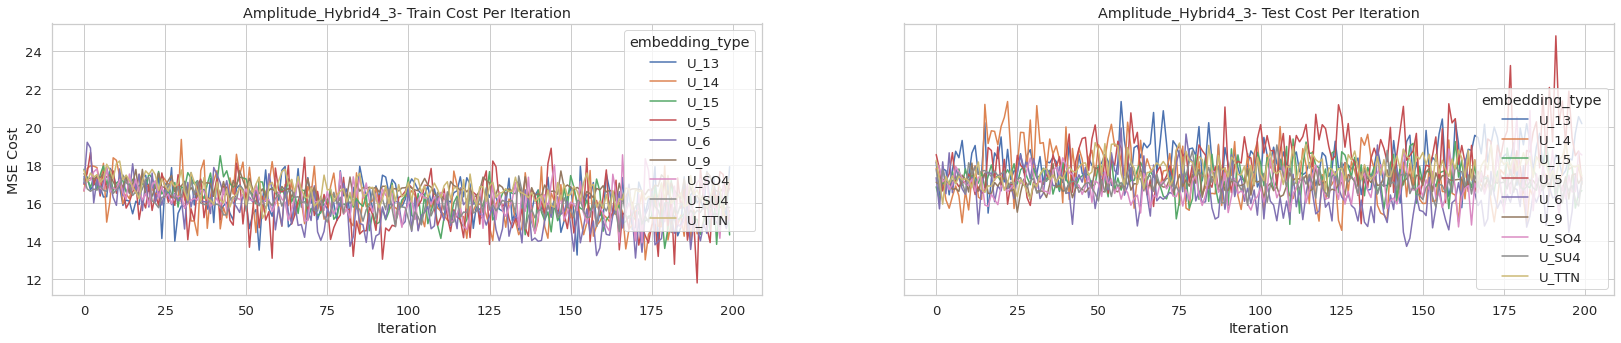

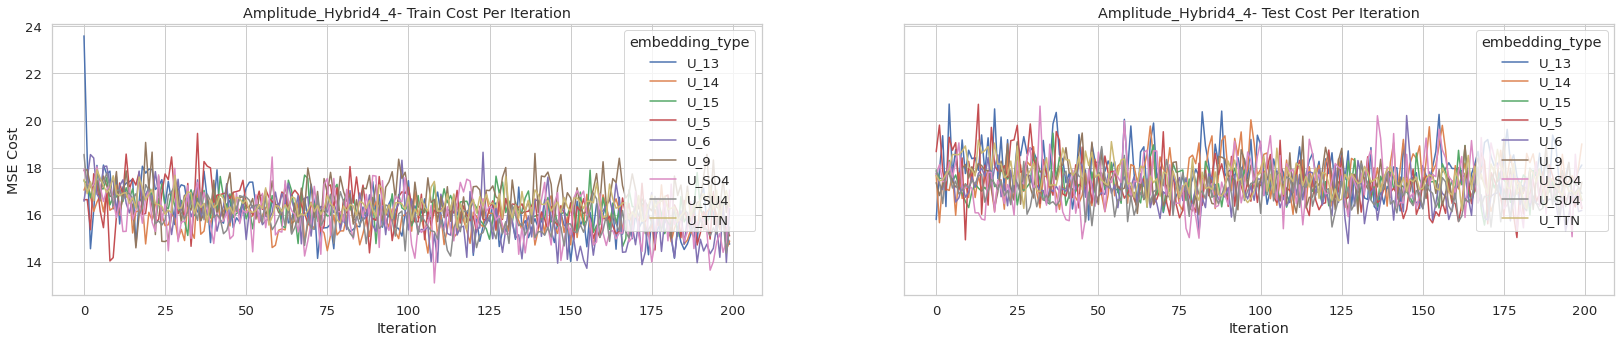

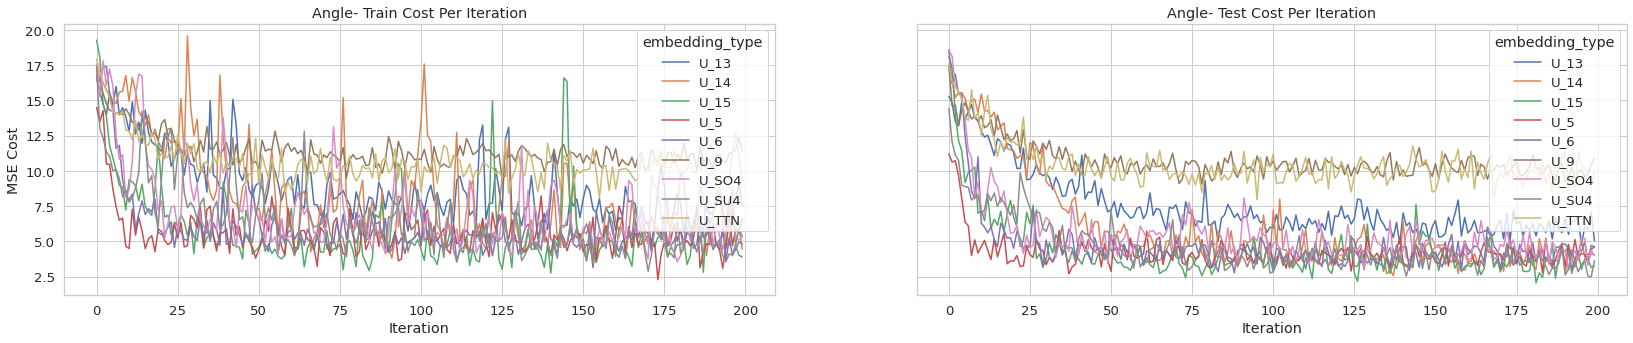

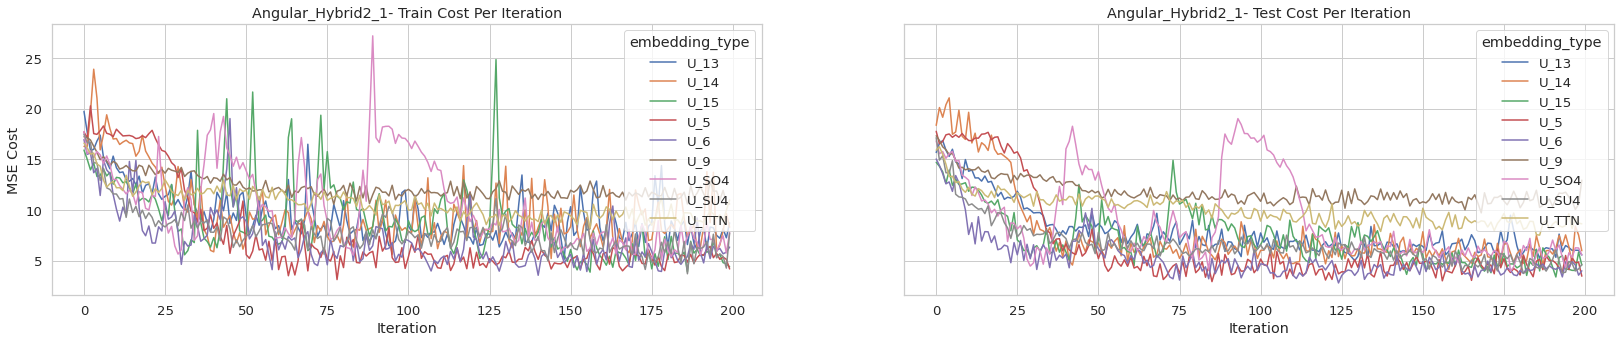

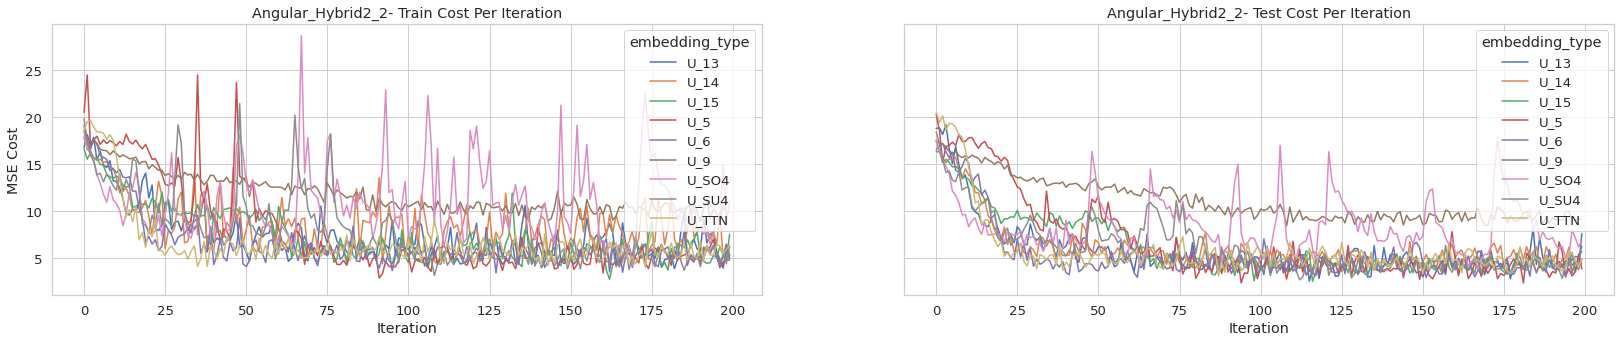

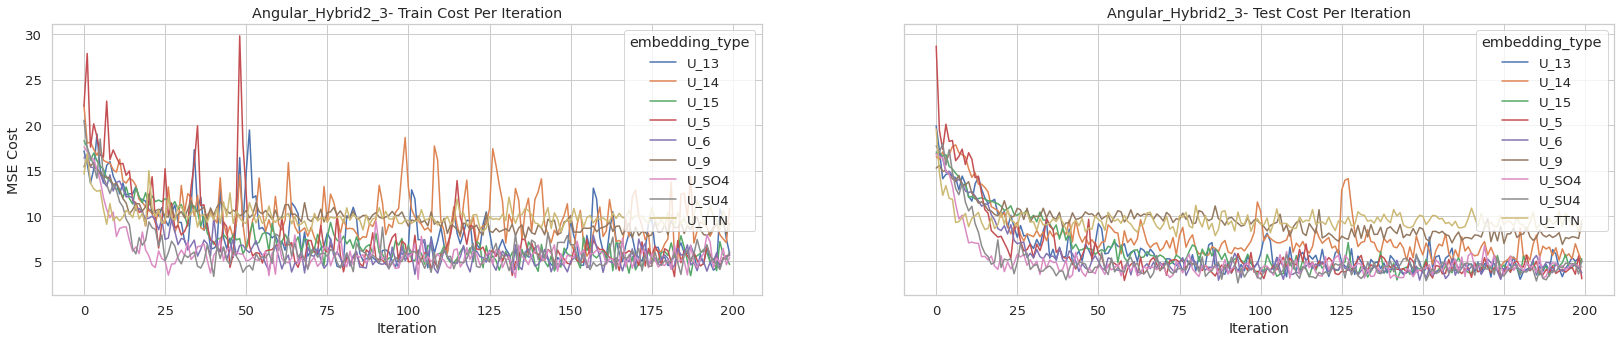

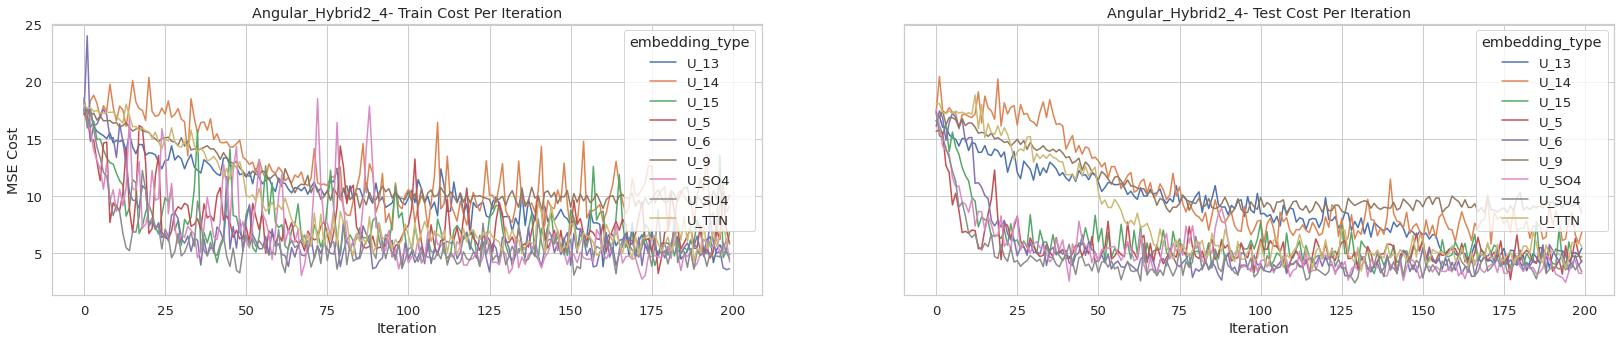

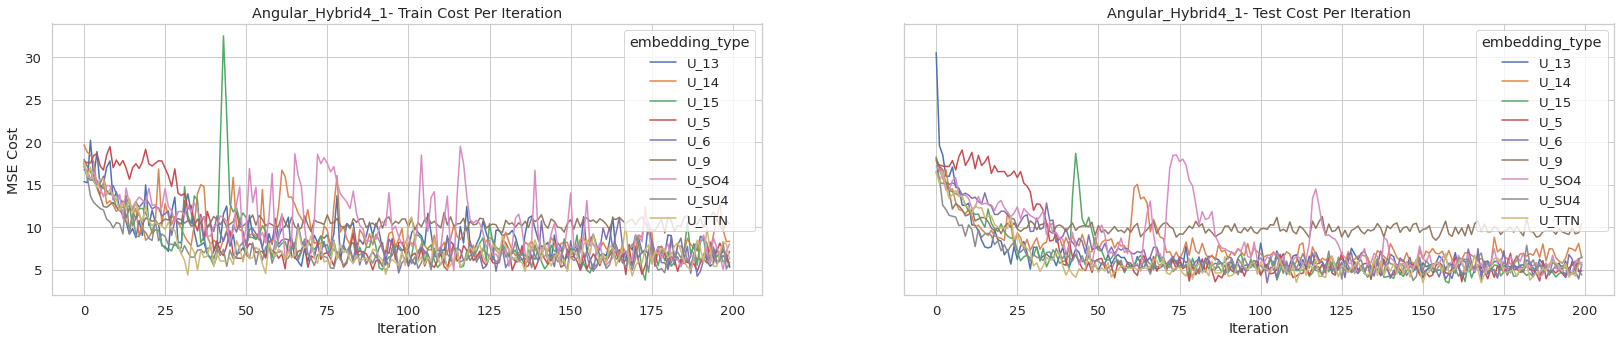

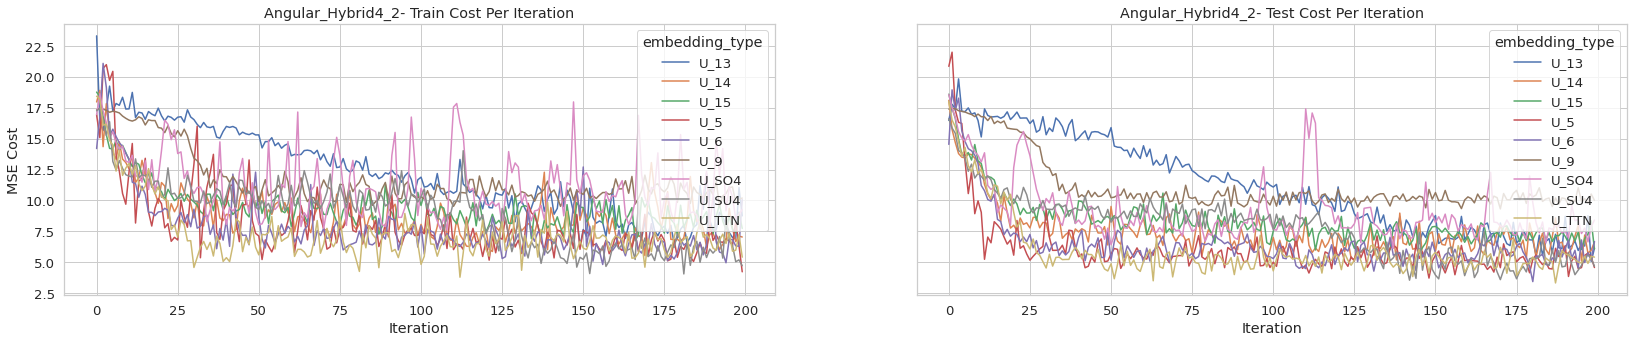

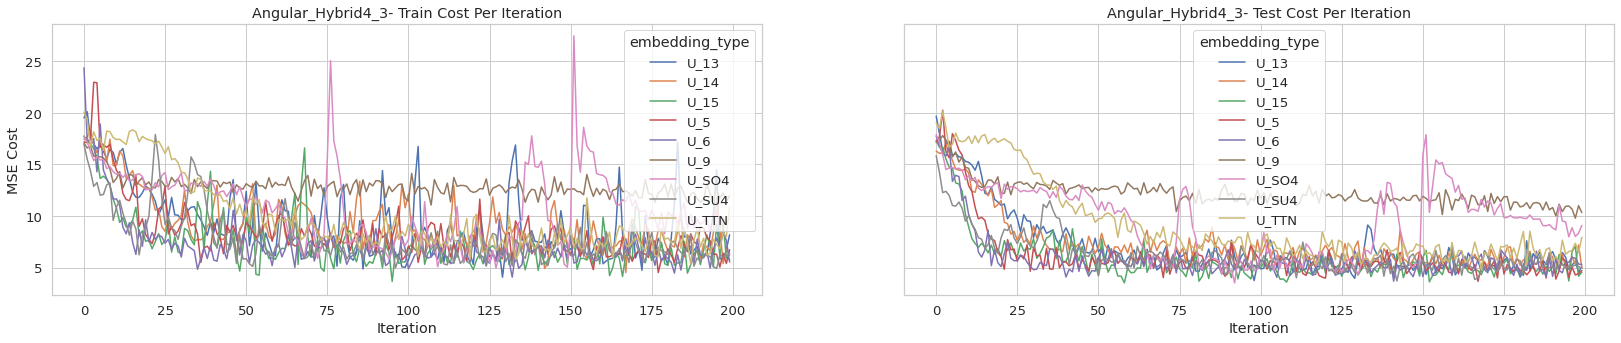

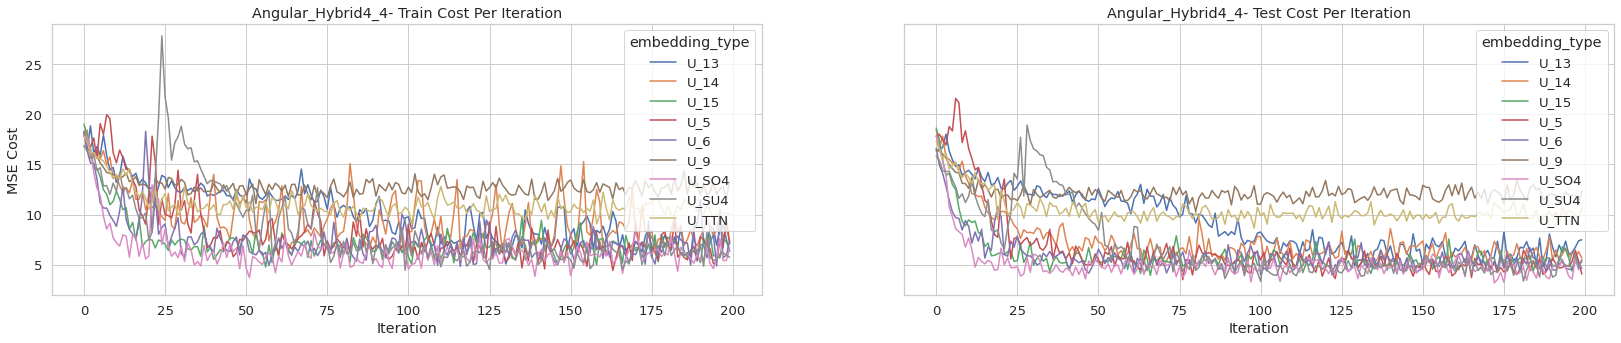

In [6]:
exp_id = 0
result_data = gather_results_0_12(exp_id, path_experiments=path_experiments)
# display(get_experiment_config(path_experiments, exp_id))
# display(
#     get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")
# )
display(
    get_result_table(
        result_data,
        ["circuit", "embedding_type"],
        "accuracy",
    )
)
display(plot_loss(result_data, ["embedding_type", "circuit"], figsize=(28, 5)))

#### Remarks

 - Amplitude_Hybrid* doesn't fit, while all angular methods are able to train
 - Angular_Hybrid2_3, Angular_Hybrid4_1 had consistent test performance on all circuits
 - Angle had good performance except for U_9 and U_TTN
 - Accuracy on pop classical is quite high (easily seperable), to measure encoding methods other target pairs needs to be tested

### Experiment 1
___
Scaling during pre-processing, U_5 circuit with Angle and Amplitude_Hybrid4_4 encoding.
 - **Encoding**: Angle, Amplitude_Hybrid4_4
 - **Circuit**: U_5
 - **Target Pair**: (Pop, Classical)
 - **Scaling**: minmax(-1, 1) / standardised
 - **Feature Selection**: pca
 

embedding_type          Amplitude_Hybrid4_4     Angle  circuit Average
circuit                                                               
U_5                                0.616667  0.966667         0.791667
embedding_type Average             0.616667  0.966667         0.791667

None

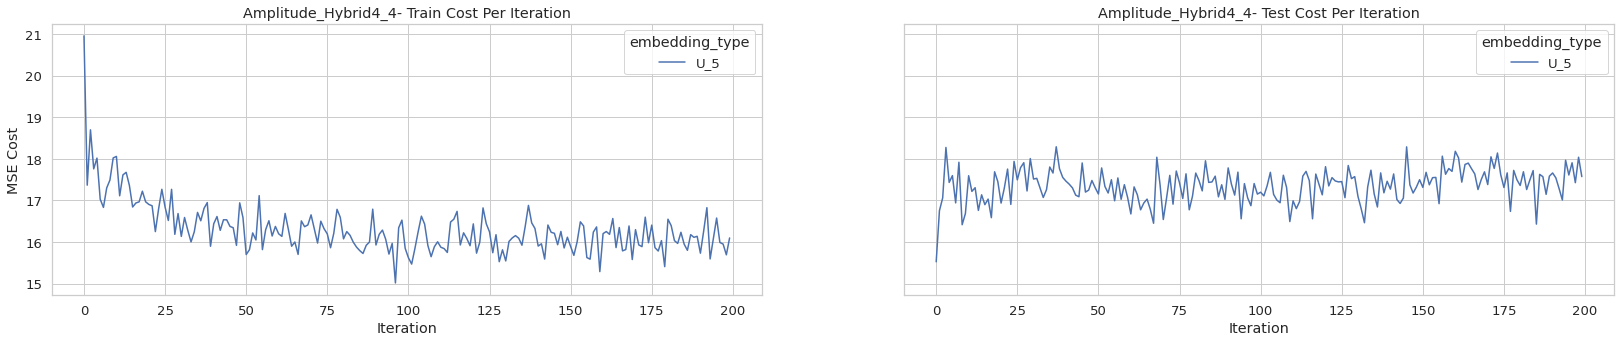

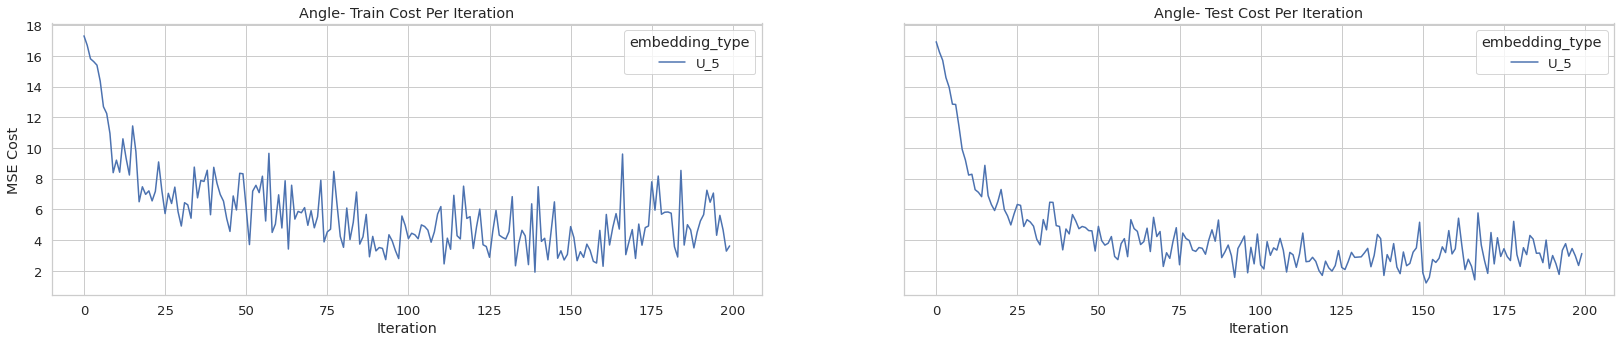

In [9]:
exp_id = 1
result_data = gather_results_0_12(exp_id, path_experiments=path_experiments)
# display(get_experiment_config(path_experiments, exp_id))
# display(
#     get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")
# )
display(
    get_result_table(
        result_data,
        ["circuit", "embedding_type"],
        "accuracy",
    )
)
display(plot_loss(result_data, ["embedding_type", "circuit"], figsize=(28, 5)))

#### Remarks

 - Amplitude_Hybrid4_4 train cost decreases a little but test increases (might be over fitting but the train cost doesn't decrease that much). 

### Experiment 2
___
Standard Scaling (guassian normalization) during pre-processing, U_5 circuit with Angle and Amplitude_Hybrid4_4 encoding.
 - **Encoding**: Angle, Amplitude_Hybrid4_4
 - **Circuit**: U_5
 - **Target Pair**: (Pop, Classical)
 - **Scaling**: standardised
 - **Feature Selection**: pca
 

embedding_type          Amplitude_Hybrid4_4  Angle  circuit Average
circuit                                                            
U_5                                0.616667    0.8         0.708333
embedding_type Average             0.616667    0.8         0.708333

None

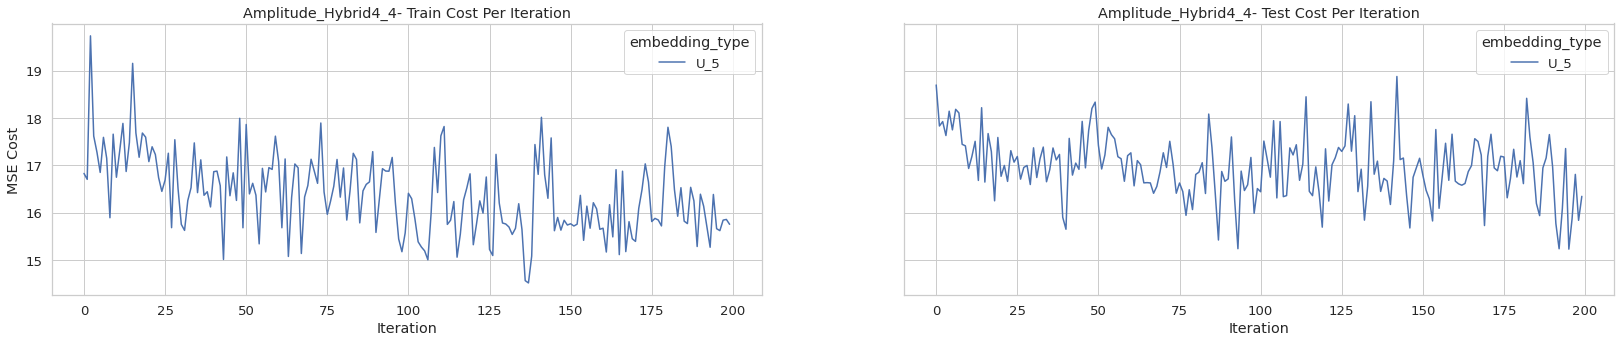

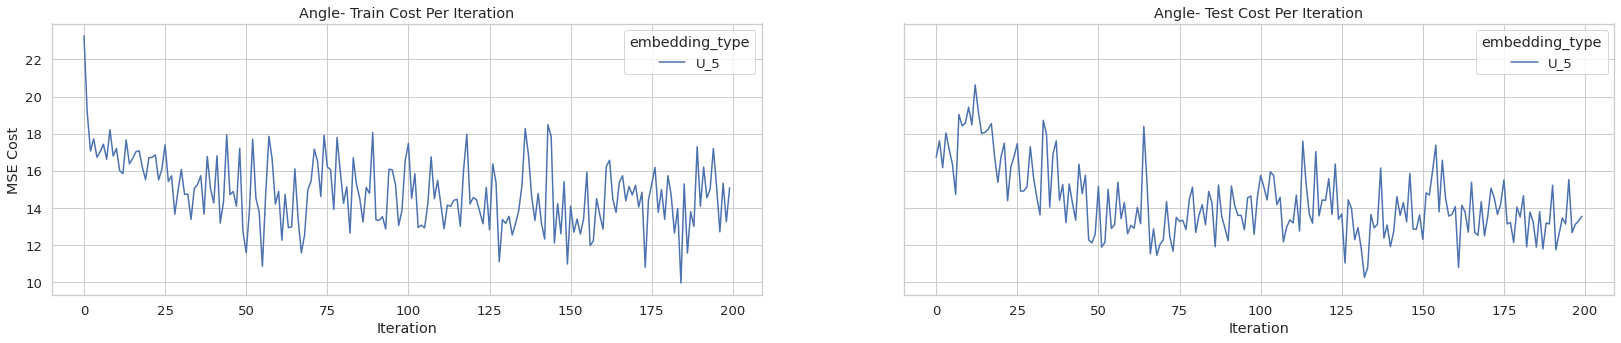

In [11]:
exp_id = 2
result_data = gather_results_0_12(exp_id, path_experiments=path_experiments)
# display(get_experiment_config(path_experiments, exp_id))
# display(
#     get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")
# )
display(
    get_result_table(
        result_data,
        ["circuit", "embedding_type"],
        "accuracy",
    )
)
display(plot_loss(result_data, ["embedding_type", "circuit"], figsize=(28, 5)))

#### Remarks

 - Performance decreased, standardisation does not work well wit Angle+U_5 